<a href="https://colab.research.google.com/github/allenlu2009/tensorflow2/blob/master/mnist/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# 1. load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

In [18]:
# 2. build model
num_classes = 10
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 3. train model with data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.5001 - accuracy: 0.8232
Epoch 2/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3757 - accuracy: 0.8639
Epoch 3/3
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3355 - accuracy: 0.8771


In [20]:
# 4. validate model with data
model.evaluate(test_images, test_labels)        # evaluate = test

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3861 - accuracy: 0.8588


[0.38613536324501035, 0.8588]

In [21]:
# 5. infer/predict use trained model
pred_labels = model.predict(test_images)
pred_labels_Y = np.argmax(pred_labels, axis=1)
#print(pred_labels)
#print(test_labels)
#print(pred_labels_Y)
# confusion matrix
print(pd.crosstab(test_labels, pred_labels_Y, rownames=['label'], colnames=['predict']))

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        860    1    9   14    1    1  106    0    8    0
1          7  959    2   21    4    0    7    0    0    0
2         15    1  760   10   57    0  156    0    1    0
3         47    8    8  885    7    0   41    0    4    0
4          0    0  155   58  592    0  194    0    1    0
5          0    0    0    1    0  935    0   33    1   30
6        151    1   63   20   28    0  730    0    7    0
7          0    0    0    0    0   13    0  926    1   60
8          2    1    6    6    1    1   14    4  965    0
9          0    0    0    0    0    4    1   19    0  976


In [0]:
# 6. save/restore model and check the accuracy 
model.save('fashion_mnist_model.h5')
new_model = tf.keras.models.load_model('fashion_mnist_model.h5')
new_pred_labels = new_model.predict(test_images)
np.testing.assert_allclose(pred_labels, new_pred_labels, atol=1e-6)

In [0]:
# Export the model to a SavedModel for multiple platforms, only for TF2.x
#tf.keras.experimental.export_saved_model(model, 'fashion_mnist_model.h6')
#new_model = tf.keras.experimental.load_from_saved_model('fashion_mnist_model.h6')
#new_pred_labels = new_model.predict(test_images)
#np.testing.assert_allclose(pred_labels, new_pred_labels, atol=1e-6)

In [24]:
df = pd.DataFrame( {'label':test_labels, 'predict':pred_labels_Y})
print(df.shape)
df[:5]

(10000, 2)


,label,predict
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [25]:
df[(df.label==6)&(df.predict==0)]

,label,predict
40,6,0
344,6,0
406,6,0
474,6,0
563,6,0
565,6,0
572,6,0
586,6,0
711,6,0
971,6,0


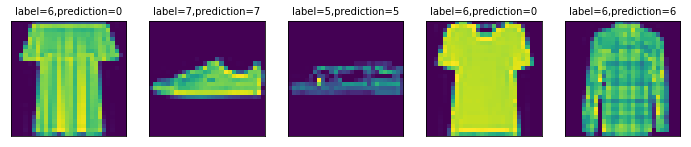

In [32]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        #ax.imshow(images[idx], cmap=’binary’)
        ax.imshow(images[idx])
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title=title+",prediction="+str(prediction[idx])
         
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

plot_images_labels_prediction(test_images, test_labels, pred_labels_Y, idx=2006, num=5)